In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utilities import read_data, read_pin, scanners

## Import Data

In [3]:
pin = read_pin("../Data/pin.csv")
data = read_data("../Data/rssi5.csv")

All beacons: ['0117C55D14E4']
Selecting all


In [4]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,2019-12-12 01:47:54.481,V1_26,-69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49659,2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,-77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49660,2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49661,2019-12-12 01:47:54.772,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN


In [5]:
locations = data['location'].unique()

## Raw Sample Rate at each Location

In [6]:
data_count = data.set_index('location')[scanners].count(axis=1)

In [7]:
data_count

location
V1_32    1
V1_32    1
V1_32    1
V1_32    1
V1_32    1
        ..
V1_26    1
V1_26    1
V1_26    1
V1_26    1
V1_26    1
Length: 49663, dtype: int64

In [8]:
def plot(data, loc):
    sample_rate = data[loc]
    x = np.arange(sample_rate.shape[0])
    print(loc)
    print("Mean: {:.2f}, Standard deviation: {:.2f}".format(sample_rate.mean(), sample_rate.std()))
    # print("{}\t{:.2f}\t{:.2f}".format(loc, sample_rate.mean(), sample_rate.std()))
    ax = sns.lineplot(x, sample_rate)
    ax.set_xlabel('Time')
    ax.set_ylabel('Sample Rate (Count)')
    ax.set_title(loc)
    plt.show()

V1_10
Mean: 1.21, Standard deviation: 0.53


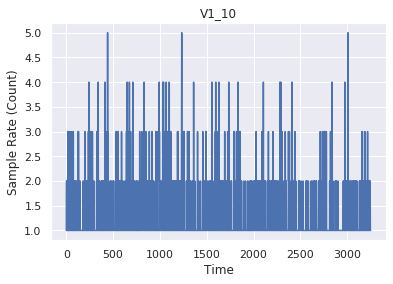

V1_11
Mean: 1.17, Standard deviation: 0.51


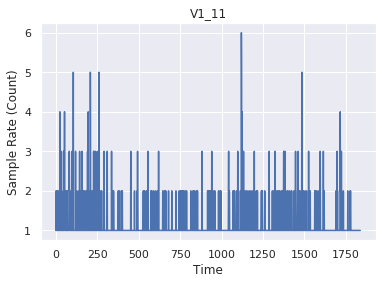

V1_12
Mean: 1.10, Standard deviation: 0.34


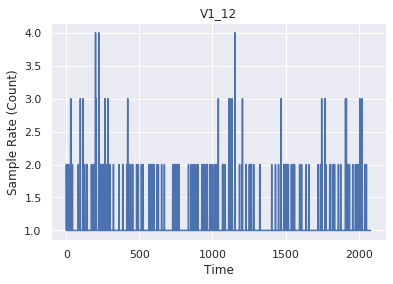

V1_13
Mean: 1.11, Standard deviation: 0.39


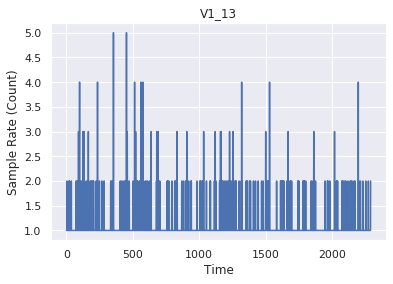

V1_14
Mean: 1.09, Standard deviation: 0.32


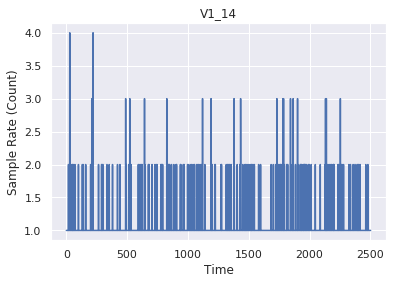

V1_18
Mean: 1.09, Standard deviation: 0.31


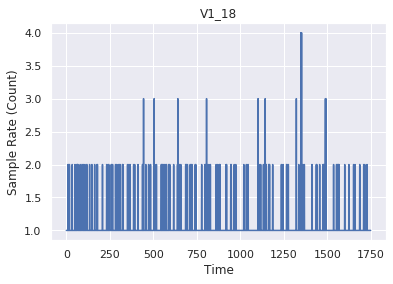

V1_19
Mean: 1.18, Standard deviation: 0.48


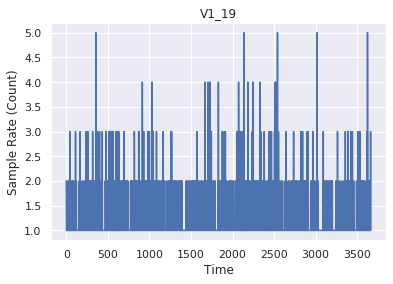

V1_20
Mean: 1.11, Standard deviation: 0.39


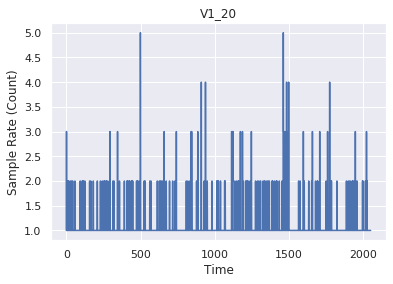

V1_21
Mean: 1.09, Standard deviation: 0.32


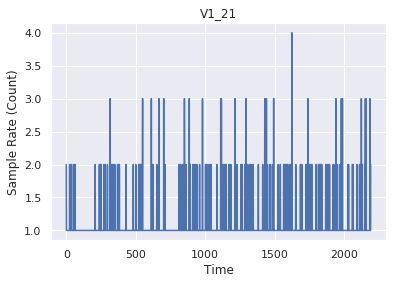

V1_22
Mean: 1.08, Standard deviation: 0.30


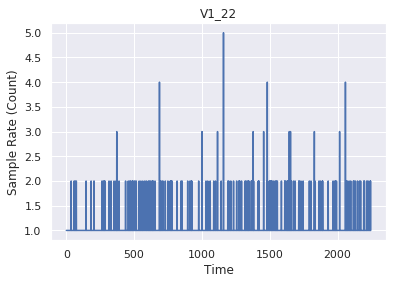

V1_23
Mean: 1.09, Standard deviation: 0.32


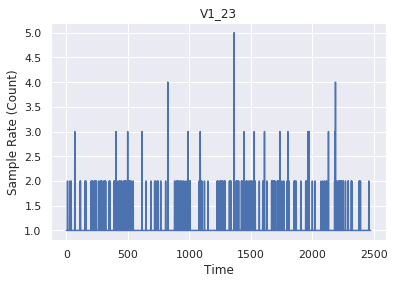

V1_24
Mean: 1.09, Standard deviation: 0.35


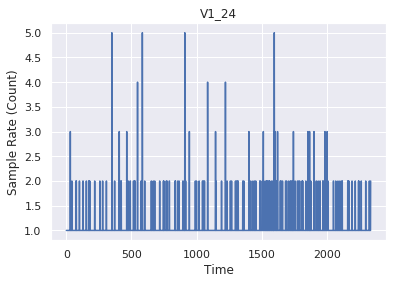

V1_26
Mean: 1.10, Standard deviation: 0.36


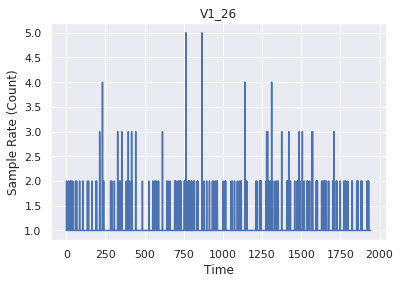

V1_27
Mean: 1.14, Standard deviation: 0.41


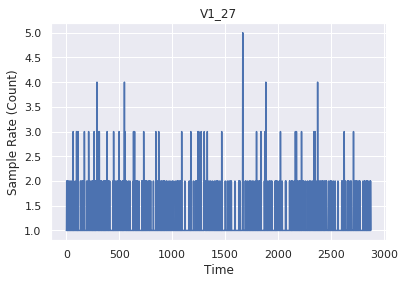

V1_28
Mean: 1.11, Standard deviation: 0.38


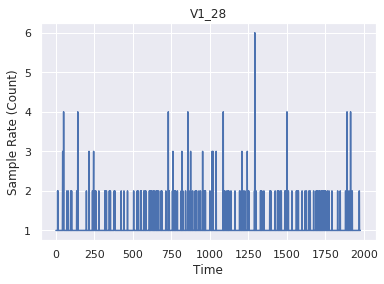

V1_29
Mean: 1.10, Standard deviation: 0.34


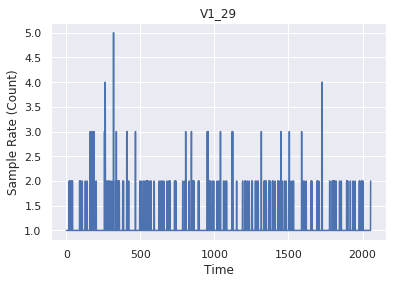

V1_30
Mean: 1.09, Standard deviation: 0.31


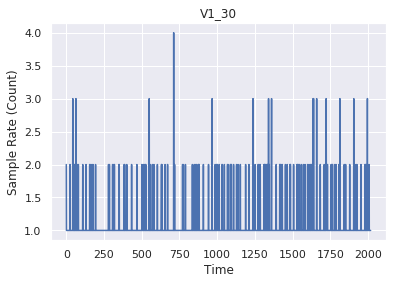

V1_31
Mean: 1.07, Standard deviation: 0.29


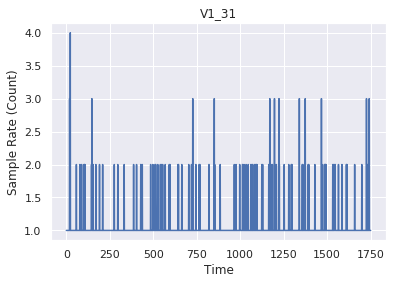

V1_32
Mean: 1.12, Standard deviation: 0.40


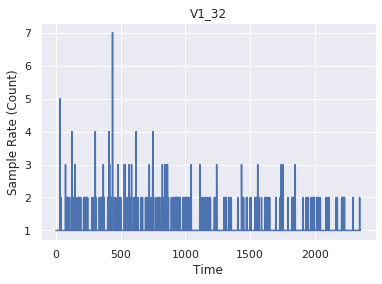

V1_8
Mean: 1.15, Standard deviation: 0.42


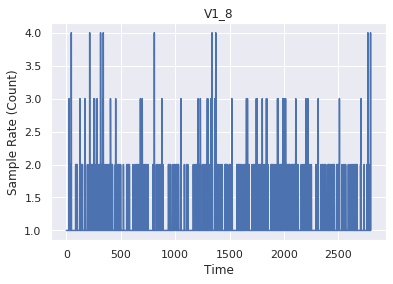

V1_9
Mean: 1.17, Standard deviation: 0.48


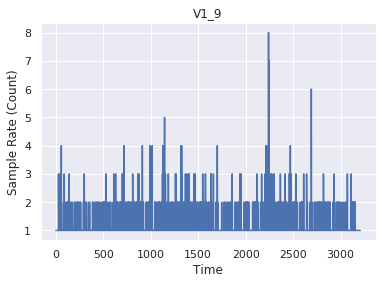

In [9]:
for loc in sorted(locations):
    plot(data_count, loc)

## Group By Data Sample Rate at each Location

In [10]:
data_grouped = data.set_index('time').groupby(["location", pd.Grouper(freq="1s")]).mean().reset_index()
data_grouped

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,2019-12-12 00:56:31,-68.666667,-87.00,NaN,NaN,NaN,-81.0,-86.5,-77.250000,NaN,-77.333333,-88.333333,-77.00,-65.666667,-75.000000,-76.500000,NaN,-71.000000
1,V1_10,2019-12-12 00:56:32,-68.250000,-79.75,NaN,-70.800000,-73.666667,-94.0,-83.0,-76.000000,NaN,-81.333333,-89.000000,-72.75,-65.000000,-79.500000,-69.000000,NaN,-78.500000
2,V1_10,2019-12-12 00:56:33,-69.000000,-83.50,NaN,-70.000000,-72.000000,NaN,-86.0,-74.750000,NaN,-77.500000,-91.000000,-77.00,-65.500000,NaN,-73.000000,NaN,-74.333333
3,V1_10,2019-12-12 00:56:34,-69.500000,-76.00,-91.000000,-68.000000,-74.000000,NaN,NaN,-72.666667,NaN,-78.500000,-88.000000,-81.00,-65.000000,-77.428571,-74.000000,NaN,-73.500000
4,V1_10,2019-12-12 00:56:35,-69.000000,NaN,NaN,-68.000000,NaN,-82.0,NaN,-75.000000,NaN,-76.500000,NaN,NaN,-64.666667,-81.000000,-75.000000,NaN,-70.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,V1_9,2019-12-12 01:12:48,-73.000000,-77.00,NaN,-63.666667,-71.333333,-87.0,NaN,NaN,-90.5,-92.000000,-93.000000,-66.25,-76.500000,-73.285714,-74.666667,NaN,-76.000000
2562,V1_9,2019-12-12 01:12:49,-70.000000,-76.00,-80.333333,-62.666667,-75.500000,-84.5,NaN,-63.666667,-88.0,-88.000000,-87.500000,-66.00,-74.000000,-73.666667,-80.000000,NaN,-77.000000
2563,V1_9,2019-12-12 01:12:50,-70.500000,-81.50,NaN,-63.500000,-71.333333,-87.0,NaN,-64.200000,-89.0,-89.000000,-87.333333,-66.60,-77.000000,-74.000000,NaN,-92.0,-78.000000
2564,V1_9,2019-12-12 01:12:51,-77.000000,NaN,-78.000000,-63.333333,NaN,NaN,NaN,-62.500000,NaN,-89.000000,-90.000000,-67.50,-75.500000,-71.500000,-76.000000,-93.0,NaN


In [11]:
data_grouped_count = data_grouped.set_index('location')[scanners].count(axis=1)

V1_32
Mean: 9.48, Standard deviation: 3.02


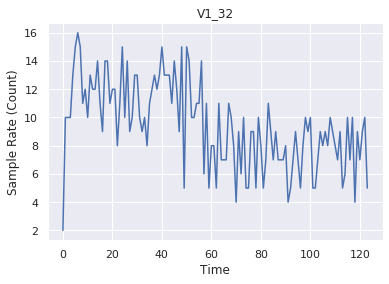

V1_22
Mean: 10.02, Standard deviation: 2.82


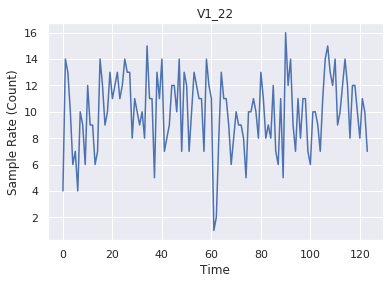

V1_14
Mean: 10.70, Standard deviation: 2.44


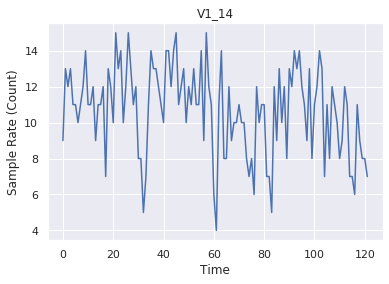

V1_13
Mean: 10.17, Standard deviation: 2.66


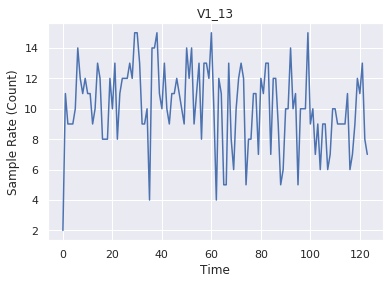

V1_12
Mean: 10.43, Standard deviation: 2.66


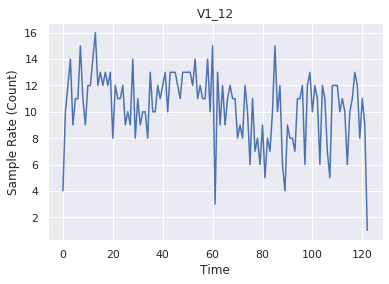

V1_21
Mean: 10.73, Standard deviation: 2.50


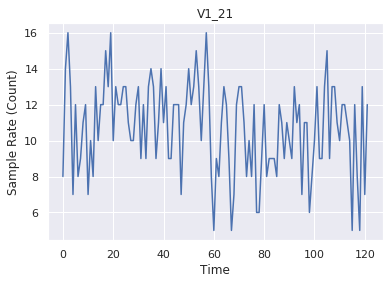

V1_29
Mean: 10.53, Standard deviation: 2.75


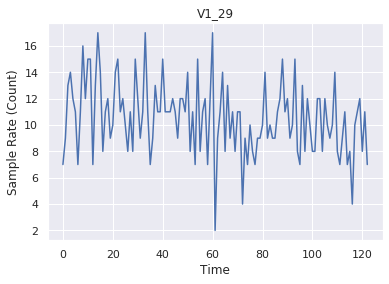

V1_30
Mean: 9.09, Standard deviation: 2.51


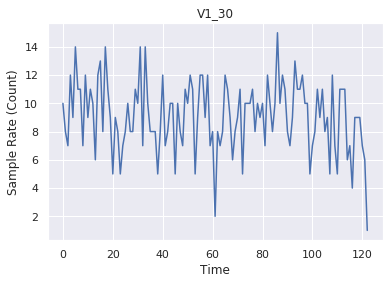

V1_31
Mean: 8.25, Standard deviation: 2.41


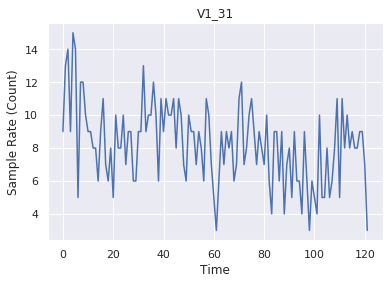

V1_23
Mean: 9.92, Standard deviation: 2.74


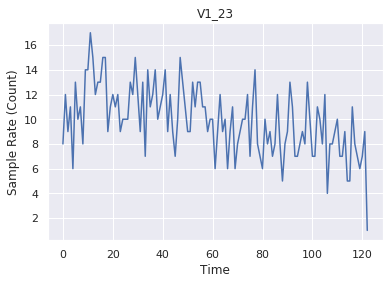

V1_24
Mean: 9.19, Standard deviation: 2.82


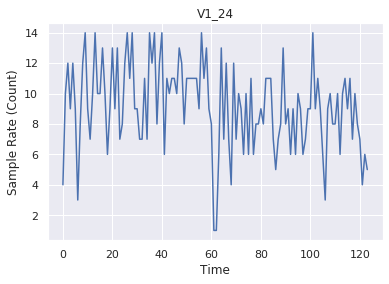

V1_11
Mean: 9.47, Standard deviation: 2.60


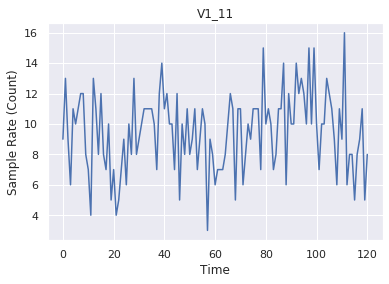

V1_20
Mean: 10.31, Standard deviation: 2.45


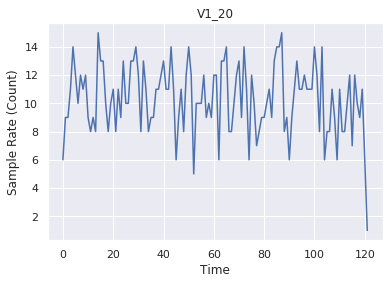

V1_28
Mean: 10.45, Standard deviation: 2.63


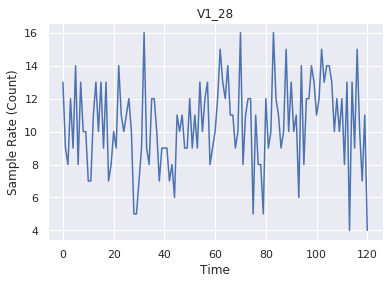

V1_10
Mean: 11.69, Standard deviation: 1.85


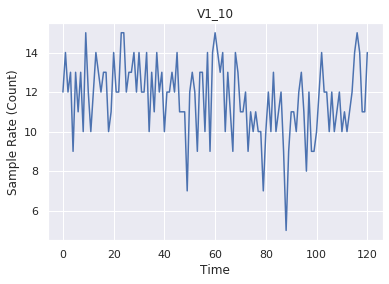

V1_19
Mean: 12.83, Standard deviation: 2.12


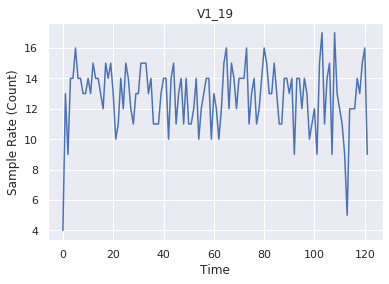

V1_27
Mean: 11.63, Standard deviation: 1.73


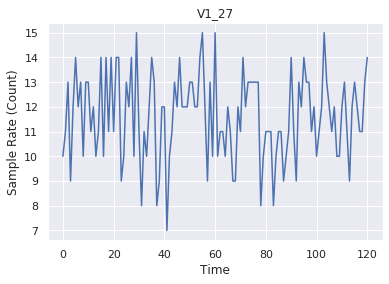

V1_9
Mean: 12.78, Standard deviation: 2.32


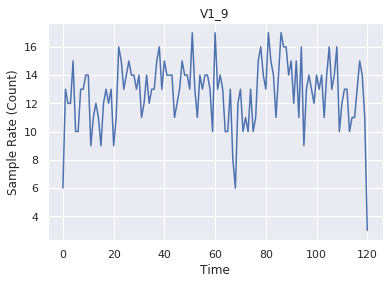

V1_8
Mean: 11.47, Standard deviation: 2.05


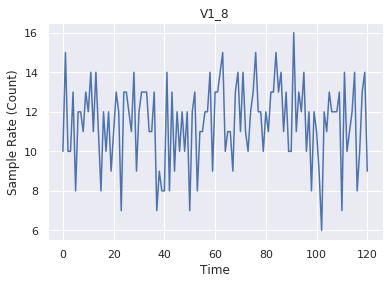

V1_18
Mean: 8.13, Standard deviation: 2.19


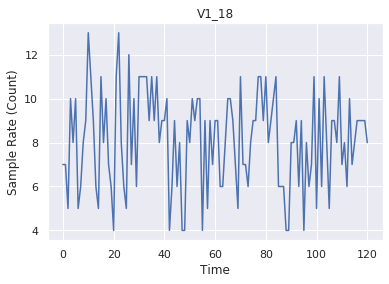

V1_26
Mean: 9.46, Standard deviation: 1.98


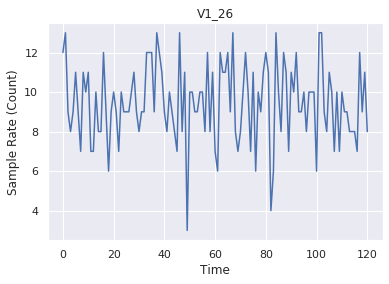

In [12]:
for loc in locations:
    plot(data_grouped_count, loc)

## Rolling Data Sample Rate at each Location

In [13]:
data_rolled = data.groupby("location").rolling(15, min_periods=1).mean().reset_index()
data_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,-89.0,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30174,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,NaN,-75.0,NaN,NaN,NaN
4,V1_10,30175,-68.0,NaN,NaN,NaN,NaN,NaN,-82.0,-84.000000,NaN,NaN,-89.0,NaN,-66.0,-75.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,V1_9,43166,NaN,NaN,-78.0,-62.333333,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-92.0,NaN
49659,V1_9,43167,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.0,-71.5,-76.0,-93.0,NaN
49660,V1_9,43168,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.500000,NaN,-89.0,-89.0,-67.0,-72.5,-71.5,-76.0,-93.0,NaN
49661,V1_9,43169,NaN,NaN,-78.0,-62.500000,NaN,NaN,NaN,-62.666667,NaN,-89.0,-89.0,-67.0,-73.0,-71.5,-76.0,-93.0,NaN


In [14]:
data_rolled_count = data_rolled.set_index('location')[scanners].count(axis=1)

V1_32
Mean: 9.28, Standard deviation: 1.89


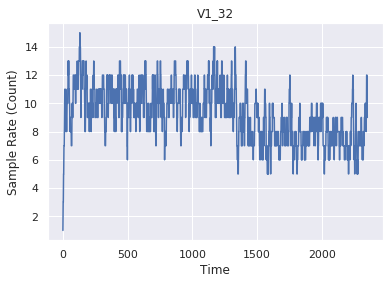

V1_22
Mean: 9.55, Standard deviation: 1.63


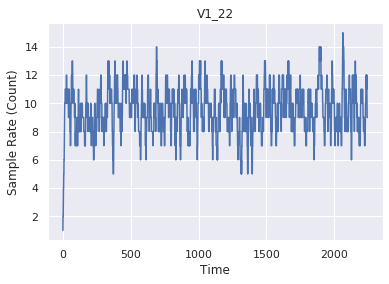

V1_14
Mean: 9.64, Standard deviation: 1.51


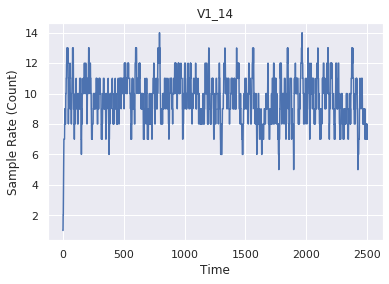

V1_13
Mean: 9.78, Standard deviation: 1.54


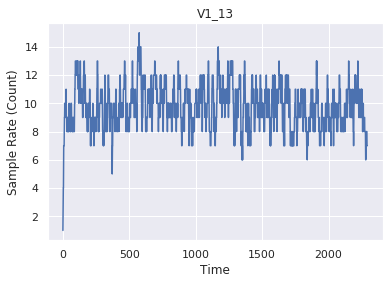

V1_12
Mean: 10.21, Standard deviation: 1.56


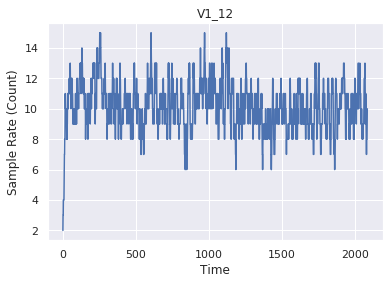

V1_21
Mean: 10.20, Standard deviation: 1.52


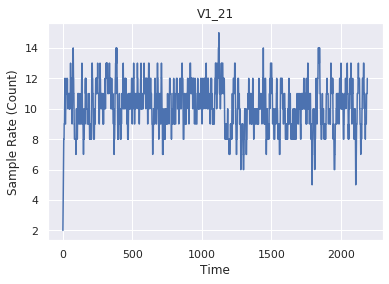

V1_29
Mean: 10.43, Standard deviation: 1.59


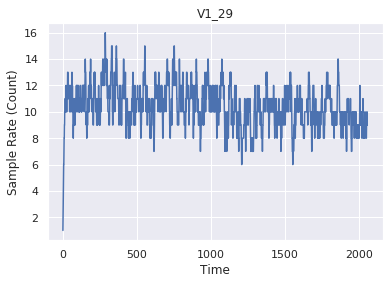

V1_30
Mean: 9.22, Standard deviation: 1.46


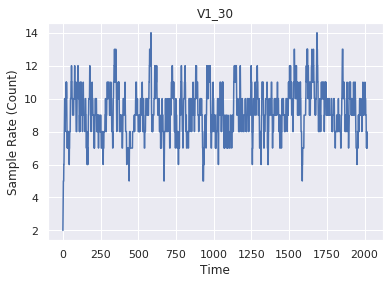

V1_31
Mean: 8.73, Standard deviation: 1.63


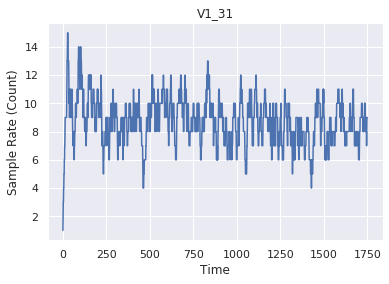

V1_23
Mean: 9.18, Standard deviation: 1.77


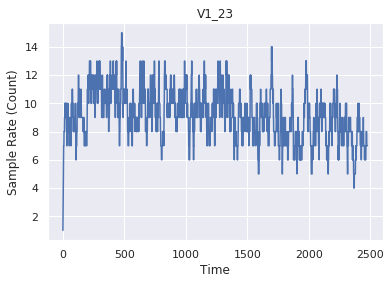

V1_24
Mean: 8.47, Standard deviation: 1.72


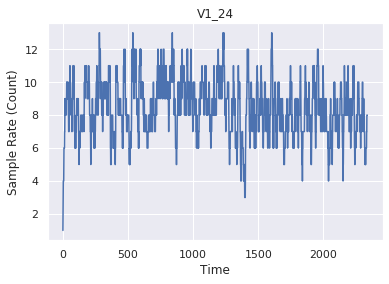

V1_11
Mean: 9.92, Standard deviation: 1.46


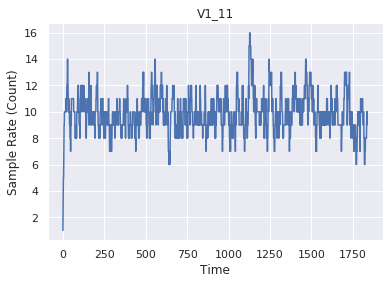

V1_20
Mean: 10.09, Standard deviation: 1.63


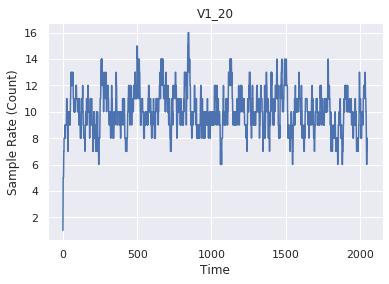

V1_28
Mean: 10.45, Standard deviation: 1.51


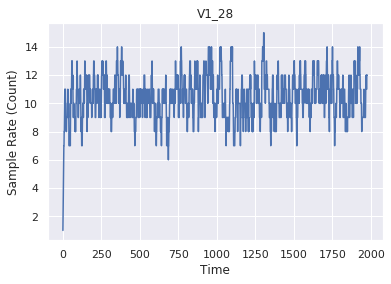

V1_10
Mean: 9.82, Standard deviation: 1.55


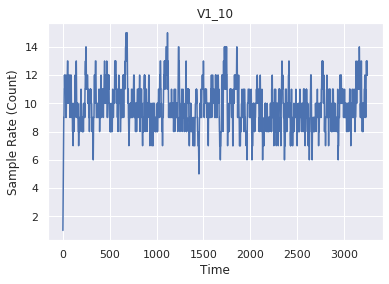

V1_19
Mean: 10.30, Standard deviation: 1.63


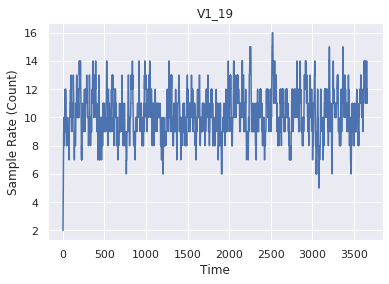

V1_27
Mean: 9.97, Standard deviation: 1.36


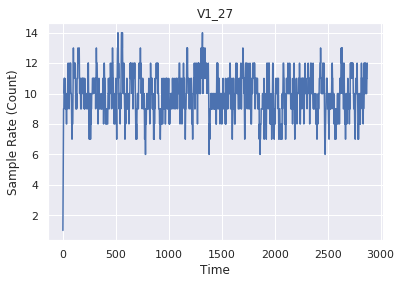

V1_9
Mean: 10.45, Standard deviation: 1.63


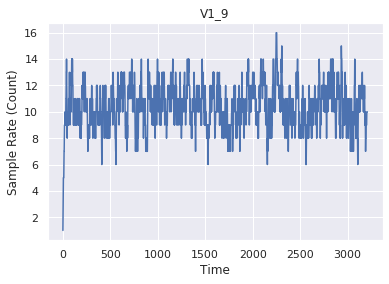

V1_8
Mean: 9.63, Standard deviation: 1.54


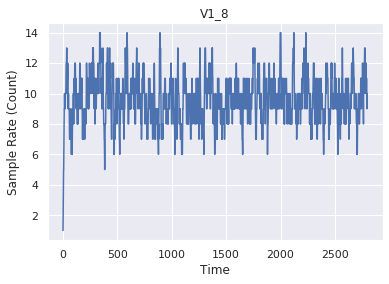

V1_18
Mean: 8.76, Standard deviation: 1.52


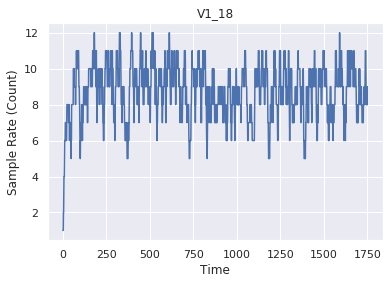

V1_26
Mean: 9.40, Standard deviation: 1.39


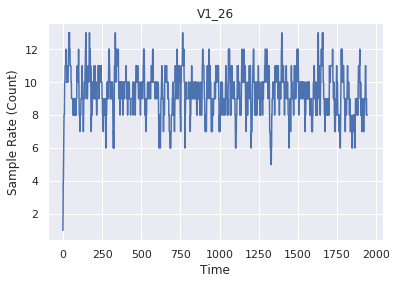

In [15]:
for loc in locations:
    plot(data_rolled_count, loc)